In [1]:
#RNN
import librosa
import pandas as pd
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

#Keras
import keras

Using TensorFlow backend.


In [2]:
x_path = 'music/music_x'
y_path = 'music/music_y'

In [3]:
file_names = ['周杰伦 - 千里之外.mp3',
'周杰伦 - 听妈妈的话.mp3',
'周杰伦 - 夜的第七章.mp3',
'周杰伦 - 心雨.mp3',
'周杰伦 - 本草纲目.mp3',
'周杰伦 - 白色风车.mp3',
'周杰伦 - 红模仿.mp3',
'周杰伦 - 菊花台 (《满城尽带黄金甲》电影片尾曲).mp3',
'周杰伦 - 迷迭香.mp3',
'周杰伦 - 退后.mp3']

In [4]:
# Prep data
time_steps = 100
X_train=np.zeros((1,time_steps,1))
Y_train=np.zeros((1,time_steps,1))

In [5]:
for file in file_names:
    print('loading',file)
    try:
        y, sr = librosa.load(y_path+'/'+file, mono=True)
        yc, sr = librosa.load(x_path+'/'+file, mono=True)
    
        music_length = len(y)
        sequence_size = int(music_length/time_steps)
    
        x_train = np.zeros((sequence_size,time_steps))
        y_train = np.zeros((sequence_size,time_steps))
    
        for i in range(sequence_size):
            x_train[i] = yc[time_steps*i:time_steps*(i+1)]
            y_train[i] = y[time_steps*i:time_steps*(i+1)]
            
  
        x_train = x_train.reshape(sequence_size,time_steps,1)[100:-100]
        y_train = y_train.reshape(sequence_size,time_steps,1)[100:-100]
    
    
        X_train = np.concatenate((X_train,x_train))
        Y_train = np.concatenate((Y_train,y_train))
    
    except IsADirectoryError:
        pass
    except FileNotFoundError:
        pass

l = int(len(X_train)*0.2)

X_test = X_train[:l]
Y_test = Y_train[:l]

X_train = X_train[l:]
Y_train = Y_train[l:]


loading 周杰伦 - 千里之外.mp3
loading 周杰伦 - 听妈妈的话.mp3
loading 周杰伦 - 夜的第七章.mp3
loading 周杰伦 - 心雨.mp3
loading 周杰伦 - 本草纲目.mp3
loading 周杰伦 - 白色风车.mp3
loading 周杰伦 - 红模仿.mp3
loading 周杰伦 - 菊花台 (《满城尽带黄金甲》电影片尾曲).mp3
loading 周杰伦 - 迷迭香.mp3
loading 周杰伦 - 退后.mp3


In [6]:
# prepare for model
input_size = 1
output_size = 1
hidden_units = 128
LR = 0.006
batch_size = 128

In [7]:
from keras.layers import SimpleRNN, Activation, TimeDistributed, Masking,Dense,LSTM
from keras.models import Sequential


model = Sequential()
model.add(SimpleRNN(units=hidden_units, return_sequences=True,stateful=True,
                    batch_input_shape = (batch_size,time_steps,input_size)))
model.add(Dense(units=128,activation='tanh'))
model.add(TimeDistributed(Dense(units = output_size)))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer=keras.optimizers.Adam(LR),
              loss='mean_squared_error',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (128, 100, 128)           16640     
_________________________________________________________________
dense_1 (Dense)              (128, 100, 128)           16512     
_________________________________________________________________
time_distributed_1 (TimeDist (128, 100, 1)             129       
Total params: 33,281
Trainable params: 33,281
Non-trainable params: 0
_________________________________________________________________


In [10]:
X_train.shape

(438554, 100, 1)

In [11]:
batch_start = 0
sequence_size = len(X_train)
l = int(sequence_size/batch_size)
print(l)
result = []
for i in range(l):
    x_batch = X_train[batch_start: batch_start+batch_size, :,:]
    y_batch = Y_train[batch_start: batch_start+batch_size, :,:]
    model.train_on_batch(x_batch,y_batch)
    batch_start = batch_size*i+128
    print(i,l) if i % 250 == 0 else i

3426
Instructions for updating:
Use tf.cast instead.
0 3426
250 3426
500 3426
750 3426
1000 3426
1250 3426
1500 3426
1750 3426
2000 3426
2250 3426
2500 3426
2750 3426
3000 3426
3250 3426


In [12]:
batch_start = 0
sequence_size = len(X_test)
l = int(sequence_size/batch_size)
print(l)
result = []
for i in range(l):
    x_batch = X_test[batch_start: batch_start+batch_size, :,:]
    y_batch = model.predict_on_batch(x_batch)
    result.append(y_batch)
    batch_start = batch_size*i+128
    print(i,l) if i % 250 == 0 else i

856
0 856
250 856
500 856
750 856


In [13]:
result = np.array(result)

In [14]:
Y_train = Y_train.flatten()
X_train = X_train.flatten()
Y_test = Y_test.flatten() # True Value
X_test = X_test.flatten() # Starting Value
result = result.flatten() # Predicted

In [15]:
result.shape

(10956800,)

In [16]:
librosa.output.write_wav('Y_train.wav',Y_train,sr,norm=True)
# ipd.Audio('Y_train.wav')

In [17]:
librosa.output.write_wav('X_train.wav',X_train,sr,norm=True)
# ipd.Audio('X_train.wav')

In [18]:
librosa.output.write_wav('Y_test.wav',Y_test,sr,norm=True)
# ipd.Audio('Y_test.wav')

In [19]:
librosa.output.write_wav('X_test.wav',X_test,sr,norm=True)
# ipd.Audio('X_test.wav')

In [20]:
librosa.output.write_wav('result.wav',result,sr,norm=True)
# ipd.Audio('result.wav')

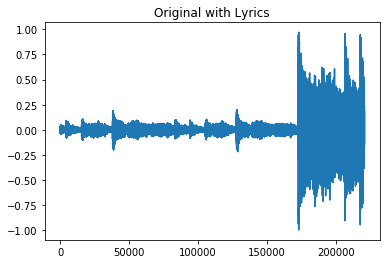

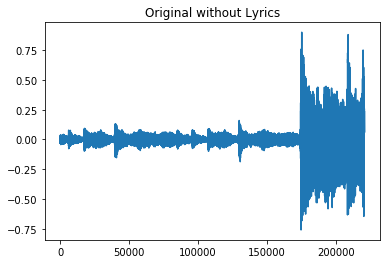

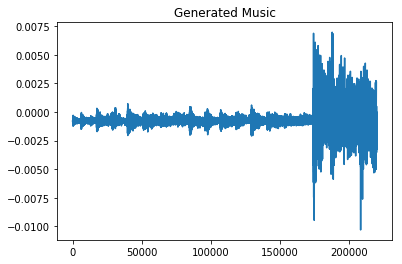

In [21]:
# compare original with new

start = 0
stop = sr*10

#plt.figure(figsize=(20,10))

plt.plot(Y_test[start:stop])
plt.title("Original with Lyrics")
plt.show()

# plt.figure(figsize=(20,10))

plt.plot(X_test[start:stop])
plt.title('Original without Lyrics')
plt.show()

plt.plot(result[start:stop])
plt.title('Generated Music')
plt.show()